# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup connection information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Setup lists to hold reponse info
lat = []
lon = []
temp = []
cloudiness = []
windspeed = []
humidity = []
maxtemp = []
country = []
date = []
city_name = []

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("------------------------")
# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities):
    #print(index, city)
   try:
        response = requests.get(query_url + city).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        maxtemp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing Record {index} | {city}")       
   except KeyError:
        print(f"City not found. Skipping {city}")        
print(f"Processed {index} records.")


Beginning Data Retrieval
------------------------
Processing Record 0 | hovd
Processing Record 1 | faanui
Processing Record 2 | kodiak
Processing Record 3 | tasiilaq
Processing Record 4 | barrow
Processing Record 5 | puerto ayacucho
Processing Record 6 | punta arenas
Processing Record 7 | ginir
Processing Record 8 | la ronge
Processing Record 9 | port alfred
Processing Record 10 | sur
Processing Record 11 | port hardy
Processing Record 12 | puerto ayora
Processing Record 13 | nemuro
Processing Record 14 | depalpur
Processing Record 15 | mazara del vallo
Processing Record 16 | hermanus
City not found. Skipping illoqqortoormiut
City not found. Skipping meyungs
Processing Record 19 | avarua
City not found. Skipping amderma
Processing Record 21 | balkhash
Processing Record 22 | busselton
Processing Record 23 | butaritari
Processing Record 24 | takapau
Processing Record 25 | laguna
Processing Record 26 | vostok
Processing Record 27 | honiara
Processing Record 28 | tiksi
Processing Record 29

Processing Record 249 | oksovskiy
Processing Record 250 | gawler
Processing Record 251 | pevek
Processing Record 252 | broome
Processing Record 253 | durango
Processing Record 254 | lagoa
City not found. Skipping toulepleu
City not found. Skipping tsihombe
Processing Record 257 | naze
Processing Record 258 | talcahuano
Processing Record 259 | hobyo
City not found. Skipping milingimbi
City not found. Skipping angra
Processing Record 262 | moose jaw
Processing Record 263 | north bend
Processing Record 264 | nantucket
Processing Record 265 | mosquera
Processing Record 266 | biskamzha
Processing Record 267 | evensk
Processing Record 268 | santiago de cao
Processing Record 269 | coahuayana
Processing Record 270 | port elizabeth
Processing Record 271 | kristiinankaupunki
Processing Record 272 | lorengau
Processing Record 273 | ankang
Processing Record 274 | narsaq
Processing Record 275 | sao lourenco do sul
Processing Record 276 | salinas
Processing Record 277 | dafeng
Processing Record 278 

Processing Record 496 | balabac
Processing Record 497 | oum hadjer
Processing Record 498 | san carlos de bariloche
Processing Record 499 | meulaboh
Processing Record 500 | rocha
Processing Record 501 | brae
Processing Record 502 | loikaw
Processing Record 503 | kedgwick
Processing Record 504 | vila velha
City not found. Skipping tostamaa
Processing Record 506 | kristinehamn
Processing Record 507 | kosum phisai
Processing Record 508 | salalah
Processing Record 509 | praia da vitoria
Processing Record 510 | arman
Processing Record 511 | innisfail
Processing Record 512 | bambui
City not found. Skipping sentyabrskiy
Processing Record 514 | nouadhibou
Processing Record 515 | acarau
Processing Record 516 | carnduff
Processing Record 517 | dera bugti
Processing Record 518 | norman wells
Processing Record 519 | alice springs
Processing Record 520 | biltine
Processing Record 521 | northam
Processing Record 522 | caracuaro
Processing Record 523 | mahibadhoo
Processing Record 524 | berbera
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# We now have the following lists:
# cities, lat, lon, temp, cloudiness, windspeed, humidity, maxtemp, country, date
# Now convert to a dataframe
weather_df = pd.DataFrame({"City": city_name,
                           "Country": country,
                          "Lat": lat,
                           "Lon": lon,
                           "Temp": temp,
                           "Cloudiness(%)": cloudiness,
                           "Windspeed": windspeed,
                           "Humidity": humidity,
                           "Max Temp": maxtemp,
                           "Date": date
                          })
# Send dataframe to CSV file
weather_df.to_csv("City_Weather.csv")


In [5]:
# Display dataframe
weather_df.head(5)

# weather_df[weather_df["Humidity"] > 100]
# No rows returned for Humidity > 100

,City,Country,Lat,Lon,Temp,Cloudiness(%),Windspeed,Humidity,Max Temp,Date
0,Khovd,MN,48.01,91.64,44.4,96,2.28,46,44.4,1586917824
1,Faanui,PF,-16.48,-151.75,83.3,28,5.77,65,83.3,1586917397
2,Saint Paul Harbor,US,57.79,-152.41,42.8,90,8.05,87,42.8,1586917825
3,Tasiilaq,GL,65.61,-37.64,28.4,2,6.93,63,28.4,1586917825
4,Barrow,US,71.29,-156.79,12.2,90,14.99,85,12.2,1586917825


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Lat,Lon,Temp,Cloudiness(%),Windspeed,Humidity,Max Temp,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.586926,12.766822,59.526010,54.100173,8.048169,67.739206,60.161917,1.586918e+09
std,32.863393,91.094250,21.009737,37.592290,5.484487,22.166936,20.883325,1.659916e+02
min,-54.800000,-175.200000,-2.200000,0.000000,0.600000,9.000000,-2.200000,1.586917e+09
25%,-7.605000,-68.550000,43.350000,20.000000,3.940000,55.000000,44.600000,1.586918e+09
50%,20.510000,15.160000,62.040000,62.000000,6.930000,72.000000,62.600000,1.586918e+09
75%,47.080000,96.865000,77.665000,90.000000,10.840000,86.000000,78.270000,1.586918e+09
max,78.220000,179.320000,93.200000,100.000000,35.010000,100.000000,93.200000,1.586918e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities with humidity over 100%.
# There are cities with humidity = 100%


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
clean_city_data.head()

,City,Country,Lat,Lon,Temp,Cloudiness(%),Windspeed,Humidity,Max Temp,Date
0,Khovd,MN,48.01,91.64,44.4,96,2.28,46,44.4,1586917824
1,Faanui,PF,-16.48,-151.75,83.3,28,5.77,65,83.3,1586917397
2,Saint Paul Harbor,US,57.79,-152.41,42.8,90,8.05,87,42.8,1586917825
3,Tasiilaq,GL,65.61,-37.64,28.4,2,6.93,63,28.4,1586917825
4,Barrow,US,71.29,-156.79,12.2,90,14.99,85,12.2,1586917825


In [9]:
# Extract relevant fields from the data frame
latitude = [clean_city_data["Lat"]]
temperature = [clean_city_data["Temp"]]
humidity = [clean_city_data["Humidity"]]
cloudiness = [clean_city_data["Cloudiness(%)"]]
windspeed = [clean_city_data["Windspeed"]]

# Export the City_Data into a csv
clean_city_data.to_csv("City_Data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

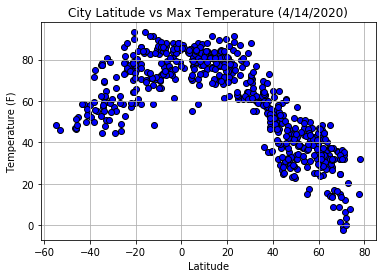

This graph shows Latitude vs Max temperature for the given cities.
As you can see, the closer to the equator (0), the warmer the max temperature
It is also shown, the further north you go (>0), the colder the max temperature as
compared to the southern hemisphere (<0)


In [10]:
plt.scatter(latitude, temperature, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs Max Temperature (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("temp_vs_latitude.png")
plt.show()

print("This graph shows Latitude vs Max temperature for the given cities.")
print("As you can see, the closer to the equator (0), the warmer the max temperature")
print("It is also shown, the further north you go (>0), the colder the max temperature as")
print("compared to the southern hemisphere (<0)")

## Latitude vs. Humidity Plot

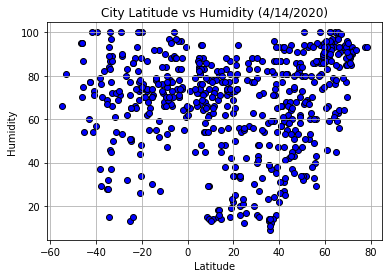

This graph represents latitude vs humidity.
As you can see from the graph, there is no pattern
relating humidity to latitude.


In [11]:
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs Humidity (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("humidity_vs_latitude.png")
plt.show()

print("This graph represents latitude vs humidity.")
print("As you can see from the graph, there is no pattern")
print("relating humidity to latitude.")

## Latitude vs. Cloudiness Plot

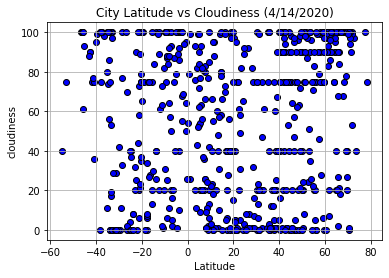

This graph represents latitude vs cloudiness.
As you can see from the graph, there is no pattern
relating cloudiness to latitude.


In [12]:
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs Cloudiness (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.grid()
plt.savefig("cloudiness_vs_latitude.png")
plt.show()

print("This graph represents latitude vs cloudiness.")
print("As you can see from the graph, there is no pattern")
print("relating cloudiness to latitude.")

## Latitude vs. Wind Speed Plot

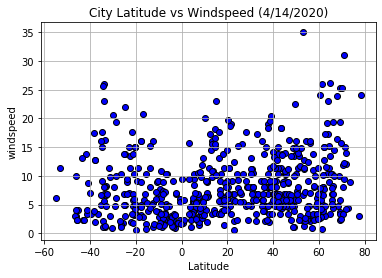

This graph represents latitude vs wind speed.
As you can see from the graph, there is no pattern
relating wind speed to latitude.


In [13]:
plt.scatter(latitude, windspeed, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs Windspeed (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("windspeed")
plt.grid()
plt.savefig("windspeed_vs_latitude.png")
plt.show()

print("This graph represents latitude vs wind speed.")
print("As you can see from the graph, there is no pattern")
print("relating wind speed to latitude.")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
#clean_city_data
northern_df = clean_city_data[clean_city_data["Lat"] > 0]
southern_df = clean_city_data[clean_city_data["Lat"] < 0]

northern_df.head()

,City,Country,Lat,Lon,Temp,Cloudiness(%),Windspeed,Humidity,Max Temp,Date
0,Khovd,MN,48.01,91.64,44.40,96,2.28,46,44.40,1586917824
2,Saint Paul Harbor,US,57.79,-152.41,42.80,90,8.05,87,42.80,1586917825
3,Tasiilaq,GL,65.61,-37.64,28.40,2,6.93,63,28.40,1586917825
4,Barrow,US,71.29,-156.79,12.20,90,14.99,85,12.20,1586917825
5,Puerto Ayacucho,VE,5.66,-67.62,79.29,63,4.76,48,79.29,1586917826


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.814680581994758


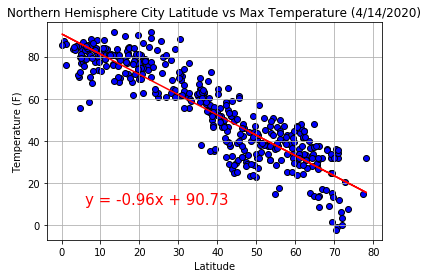

In [16]:
north_lat = northern_df["Lat"]
north_temp = northern_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)

regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker="o", facecolors="blue", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Max Temperature (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("temp_vs_north_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4651354359812336


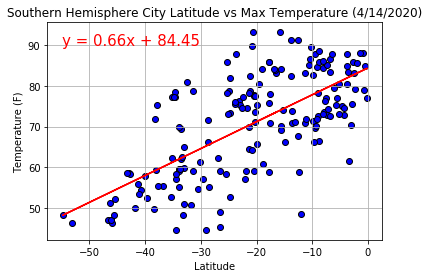

These two plots show the relationship between latitude and temperature.
As you can see, the closer you get to the equator (0), the higher the temperature.
This holds true for both north and south latitudes.


In [42]:
south_lat = southern_df["Lat"]
south_temp = southern_df["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)

regress_values = south_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker="o", facecolors="blue", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Max Temperature (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("temp_vs_south_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print("These two plots show the relationship between latitude and temperature.")
print("As you can see, the closer you get to the equator (0), the higher the temperature.")
print("This holds true for both north and south latitudes.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09274734709084867


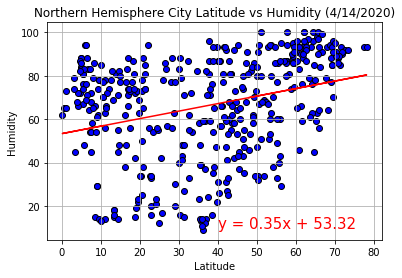

In [25]:
north_lat = northern_df["Lat"]
north_hum = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)

regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_hum, marker="o", facecolors="blue", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Humidity (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("humidity_vs_north_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008964018503388505


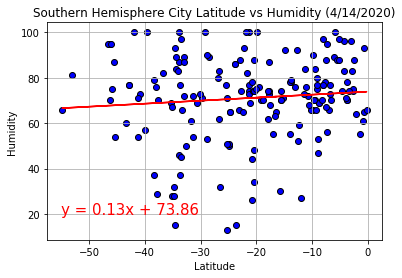

In [28]:
south_lat = southern_df["Lat"]
south_hum = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)

regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_hum, marker="o", facecolors="blue", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Humidity (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("humidity_vs_south_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0702446051730472


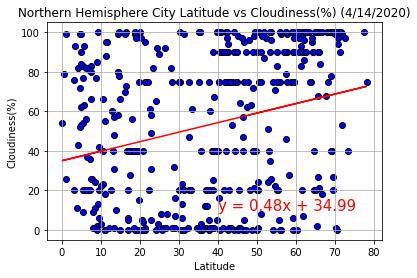

In [29]:
north_lat = northern_df["Lat"]
north_cloud = northern_df["Cloudiness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)

regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud, marker="o", facecolors="blue", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Cloudiness(%) (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("cloudiness_vs_north_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0011249212630405707


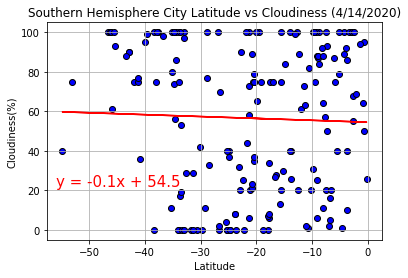

Northern Hemisphere cities, tend to have a higher cloudiness(%) the further
you travel from the equator.  Southern Hemisphere cities follow the same pattern,
although, to a lesser degree.


In [43]:
south_lat = southern_df["Lat"]
south_cloud = southern_df["Cloudiness(%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)

regress_values = south_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud, marker="o", facecolors="blue", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-56, 22),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("cloudiness_vs_south_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print("Northern Hemisphere cities, tend to have a higher cloudiness(%) the further")
print("you travel from the equator.  Southern Hemisphere cities follow the same pattern,")
print("although, to a lesser degree.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.038807542613269484


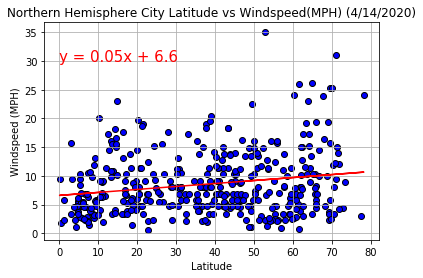

In [39]:
north_lat = northern_df["Lat"]
north_wind = northern_df["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)

regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind, marker="o", facecolors="blue", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title("Northern Hemisphere City Latitude vs Windspeed(MPH) (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (MPH)")
plt.grid()
plt.savefig("windspeed_vs_north_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.056056893739299736


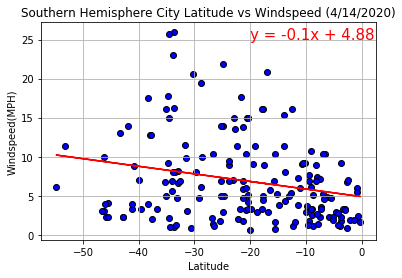

The average windspeed increases gradually as you travel away from the
equator in both the North and South Hemispheres.


In [44]:
south_lat = southern_df["Lat"]
south_wind = southern_df["Windspeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)

regress_values = south_lat * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind, marker="o", facecolors="blue", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-20, 25),fontsize=15,color="red")
plt.title("Southern Hemisphere City Latitude vs Windspeed (4/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed(MPH)")
plt.grid()
plt.savefig("windspeed_vs_south_latitude.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

print("The average windspeed increases gradually as you travel away from the")
print("equator in both the North and South Hemispheres.")